## matplotlib
- python의 대표적인 chart 및 visualization 패키지
- matplotlib 내의 pyplot 또는 pylab이라는 서브패키지를 chart 그리는 데 주로 사용
- 아래 사이트에서 적절한 것을 선택하고 수정하여 사용하면 됨

  http://matplotlib.org/gallery.html

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

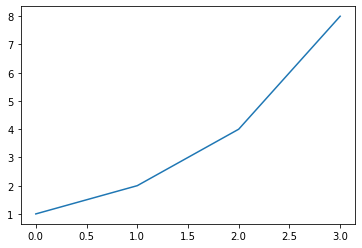

In [4]:
plt.plot([1,2,4,8])
plt.show()

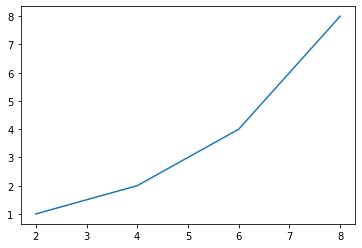

In [5]:
plt.plot([2,4,6,8],[1,2,4,8])
plt.show()

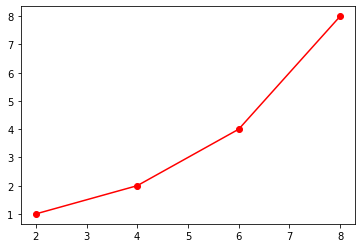

In [6]:
plt.plot([2,4,6,8],[1,2,4,8],'ro-') #y:색상(red),o:마커(circle),-:선스타일(solid)
plt.show()

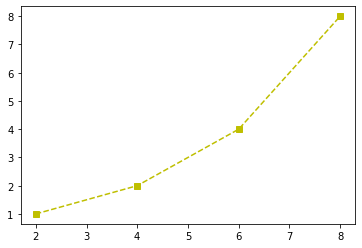

In [7]:
plt.plot([2,4,6,8],[1,2,4,8],'ys--') #y:색상(yellow),o:마커(circle),--:선스타일(dotted)
plt.show()

#### Chart 스타일 지정
- '색상,마커,선'의 순서로 지정
- 예) 'rc--' (빨간색 둥근마커로 점선), 'ys-'(노란색 사각마커로 실선)
- 아래 사이트에서 상세 옵션 참고

https://datascienceschool.net/view-notebook/d0b1637803754bb083b5722c9f2209d0/

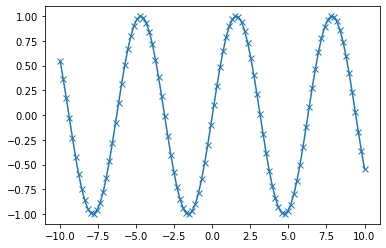

In [10]:
# X축: -10에서 10까지 100등분
x = np.linspace(-10, 10, 100)
# Y축: 사인(sin) 함수를 사용하여 y 계산
y = np.sin(x)
# 플롯(plot) 함수는 한 배열의 값을 다른 배열에 대응해서 선 그래프 그림
plt.plot(x, y, marker="x")
plt.show()

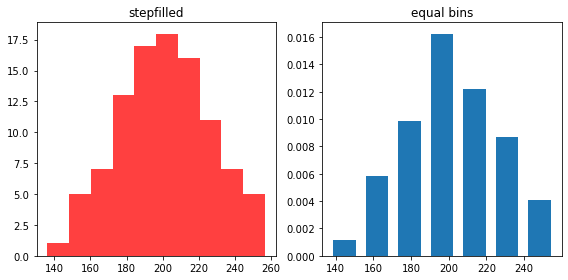

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

mu = 200
sigma = 25
x = np.random.normal(mu, sigma, size=100)
#print(x)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))

ax0.hist(x, 10, histtype='stepfilled', facecolor='r', alpha=0.75)
ax0.set_title('stepfilled')

ax1.hist(x, 7, density=True, stacked=True, histtype='bar', rwidth=0.7)
ax1.set_title('equal bins')

fig.tight_layout()
plt.show()

[ 58.41110865  62.2779118   66.14471495  70.0115181   73.87832125
  77.7451244   81.61192754  85.47873069  89.34553384  93.21233699
  97.07914014 100.94594329 104.81274644 108.67954958 112.54635273
 116.41315588 120.27995903 124.14676218 128.01356533 131.88036847
 135.74717162]


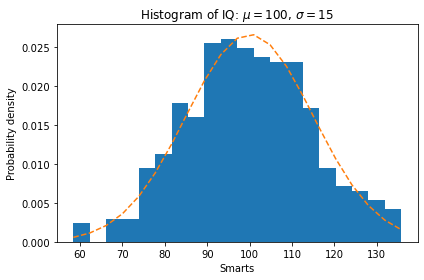

In [12]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(0)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)
num_bins = 20

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True, stacked=True)
print(bins)
# add a 'best fit' line
y = norm.pdf(bins, mu, sigma) #Return the normal pdf evaluated at bins (args: mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

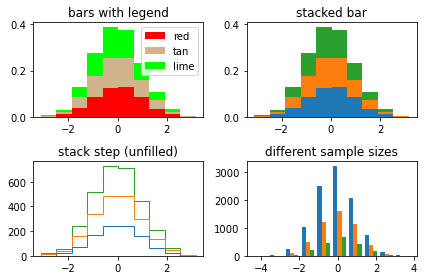

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=True, stacked=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, stacked=True, histtype='bar')
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (4).

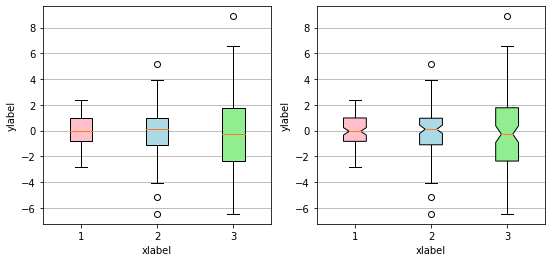

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Random test data
np.random.seed(123)
all_data = [np.random.normal(0, std, 100) for std in range(1, 4)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = axes[0].boxplot(all_data,
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

# notch shape box plot
bplot2 = axes[1].boxplot(all_data,
                         notch=True,  # notch shape
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))], )
    ax.set_xlabel('xlabel')
    ax.set_ylabel('ylabel')

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])

plt.show()

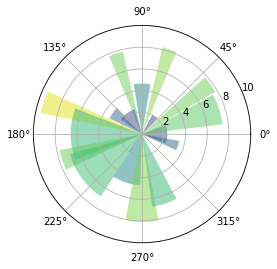

In [18]:
# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)

ax = plt.subplot(111, projection='polar')
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.viridis(r / 10.))
    bar.set_alpha(0.5)

plt.show()